In [ ]:
""" This module is meant to quantify how much shorter the ice-growth season has become. """

In [1]:
from class_ai import Temperature_Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
### Set up my Class
data = pd.read_excel("cleandata.xlsx", sheet_name=None)
tp = Temperature_Data(data)
years = tp.years
years = years[::-1]

In [16]:
temps = tp.collect_day(3, 1, "average")[::-1]
x = np.array(years).astype(int)
z = np.polyfit(x, temps, 1)  # z[0] = slope (m), z[1] = intercept (b)
m, b = z
freeze_year = (32 - b) / m
print(int(freeze_year))

2020


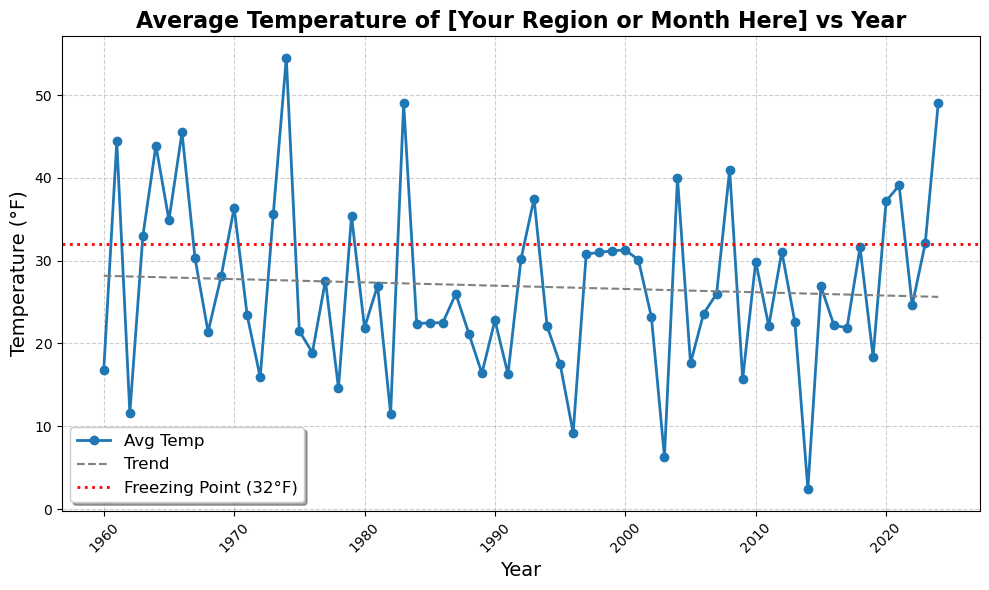

Trend (°F per decade): -0.4


In [19]:
temps = tp.collect_day(3, 3, "average")[::-1]

# Convert years to integers
x = np.array(years).astype(int)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, temps, marker='o', linewidth=2, label='Avg Temp')

# Optional trend line
z = np.polyfit(x, temps, 1)
p = np.poly1d(z)
plt.plot(x, p(x), linestyle='--', color='gray', label='Trend')

# Freeze line at 32°F
plt.axhline(y=32, color='red', linestyle=':', linewidth=2, label='Freezing Point (32°F)')

# Titles and labels
plt.title("Average Temperature of [Your Region or Month Here] vs Year", fontsize=16, weight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Temperature (°F)", fontsize=14)

# Style improvements
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.legend(frameon=True, shadow=True, fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

# Optional: slope info
print("Trend (°F per decade):", round(z[0]*10, 2))
